# Introduction To Exponential Smoothing

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.forecasting.exp_smoothing import ExponentialSmoothing as ets
from sktime.forecasting.ets import AutoETS

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 50

In [33]:
# Read in the data
df = pd.read_csv("../../data/intro_ets.csv")

In [34]:
# Examine the start of 
df.head()

,t1,t2,t3,t4
0,1.164927,0.00,0.315228,1.164927
1,1.886936,0.04,1.339403,1.176576
2,1.996980,0.08,1.250589,1.188342
3,1.315115,0.12,2.132702,1.200225
4,1.817358,0.16,2.792829,1.212227


# Simple Exponential Smoothing

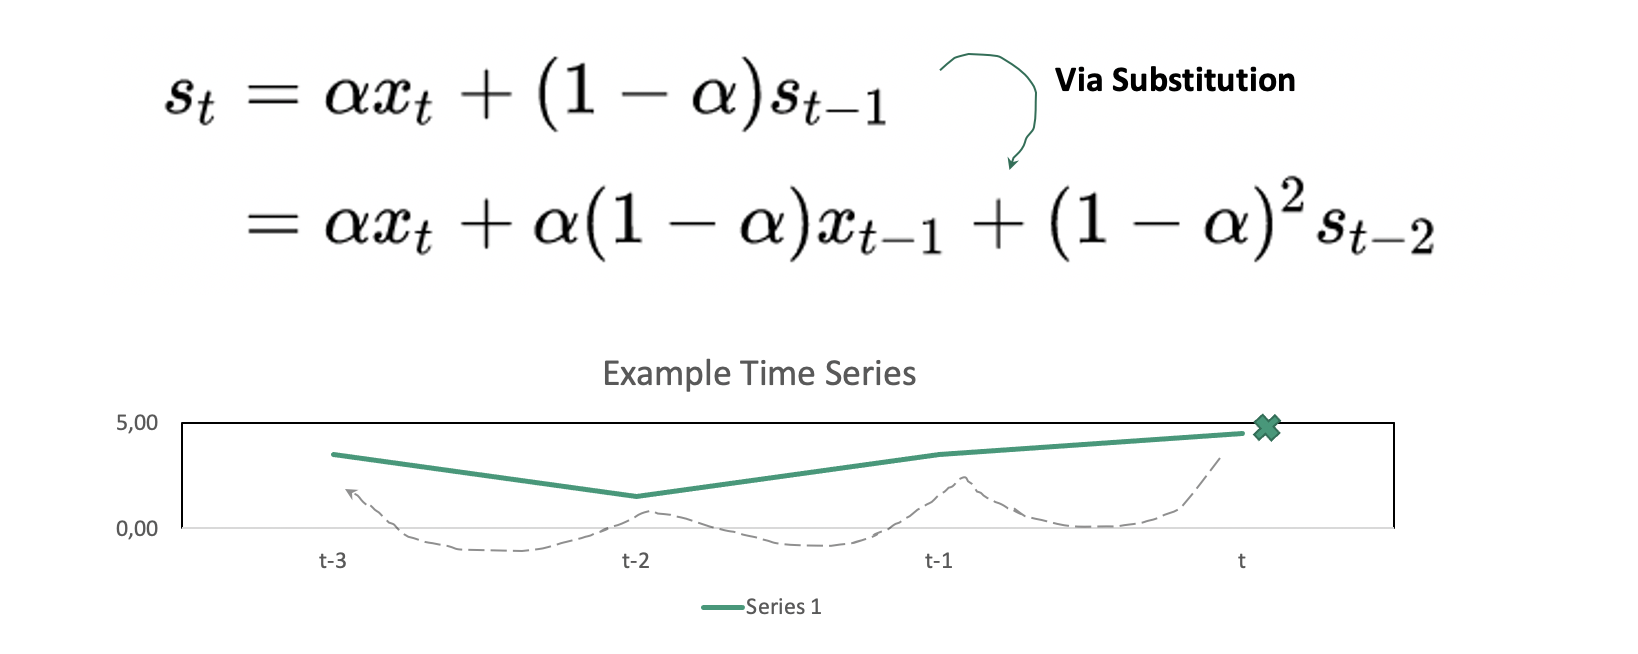

Text(0.5, 1.0, 'Time Series #1')

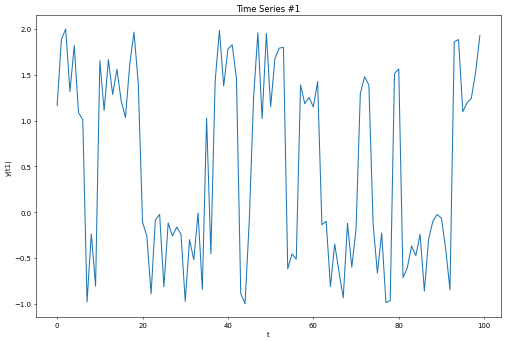

In [47]:
plt.plot(df['t1'])
plt.xlabel("t")
plt.ylabel("y(t1)")
plt.title('Time Series #1')

In [36]:
# Simple exponential smoothing
ets_model = ets(trend=None,
               damped=False,
               seasonal=None,
               smoothing_level = 0.2, # Single exponential smoothing (Alpha )
               smoothing_slope = None, # Double Exponential smoothing (Beta)
               smoothing_seasonal = None ) # Triple Exponential smoothing (Gamma)

In [37]:
# Extract the fits
def extract_fit(y, model_object):
    y_fit = [np.nan, np.nan]
    for i in range(3,len(y)):  
        model_object.fit(y.iloc[:i])
        yh = model_object.predict(fh=0)
        y_fit.append(yh.to_numpy()[0])
    
    return np.array(y_fit)

/Users/aaronpickering/opt/miniconda3/envs/btsa/lib/python3.7/site-packages/sktime/forecasting/exp_smoothing.py:99: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  seasonal_periods=self.sp,
/Users/aaronpickering/opt/miniconda3/envs/btsa/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/Users/aaronpickering/opt/miniconda3/envs/btsa/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning
/Users/aaronpickering/opt/miniconda3/envs/btsa/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1136: FutureWarning: use_basinhopping is deprecated. Set optimization method using 'method'. This option will be removed after 0.13 is released.
  FutureWarning,


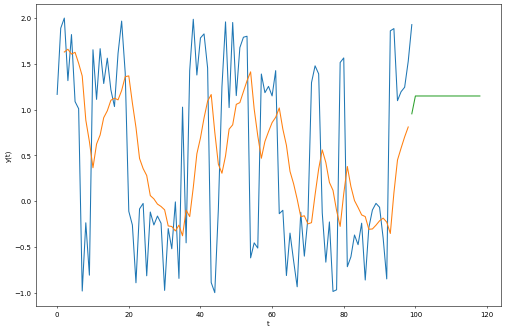

In [41]:
y_fit = extract_fit(df['t1'], ets_model)
ets_model.fit(df['t1'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t1'])
plt.plot(y_fit)
plt.xlabel("t")
plt.ylabel("y(t)1")
plt.show()

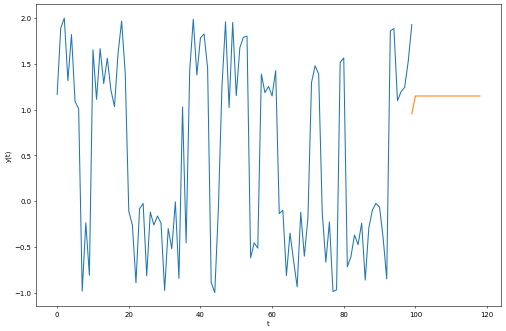

In [42]:
# Forecast
plt.plot(df['t1'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)1")
plt.show()

 ### What happens when we try it on a a series with a trend?

Text(0.5, 1.0, 'Time Series #2')

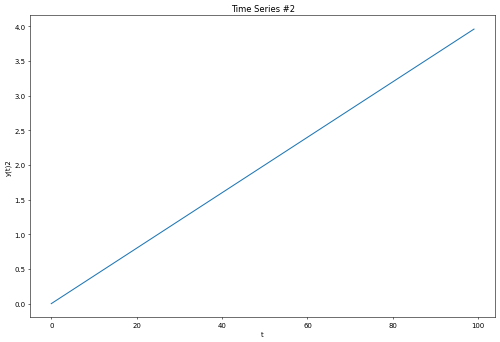

In [44]:
plt.plot(df['t2'])
plt.xlabel("t")
plt.ylabel("y(t)2")
plt.title('Time Series #2')

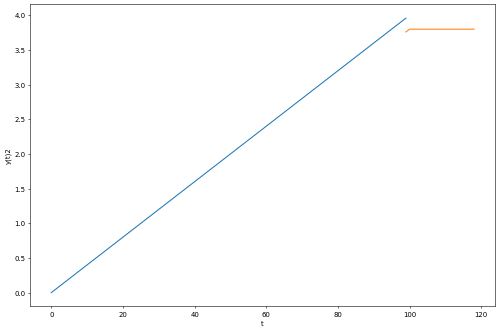

In [46]:
y_fit = extract_fit(df['t2'], ets_model)
ets_model.fit(df['t2'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t2'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)2")
plt.show()

# Double Exponential Smoothing

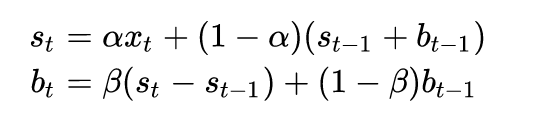

In [48]:
# Simple exponential smoothing
ets_model = ets(trend="additive",
               damped=False,
               seasonal=None,
               smoothing_level = 0.5, # Single exponential smoothing (Alpha )
               smoothing_slope = 0.5, # Double Exponential smoothing (Beta)
               smoothing_seasonal = None ) # Triple Exponential smoothing (Gamma)

/Users/aaronpickering/opt/miniconda3/envs/btsa/lib/python3.7/site-packages/sktime/forecasting/exp_smoothing.py:110: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  use_basinhopping=self.use_basinhopping,


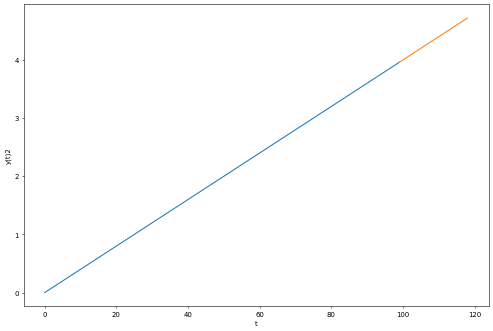

In [49]:
y_fit = extract_fit(df['t2'], ets_model)
ets_model.fit(df['t2'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t2'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)2")
plt.show()

### Ok, that works on simple series, but what if we want to exploit a known seasonal pattern?

Text(0.5, 1.0, 'Time Series #3')

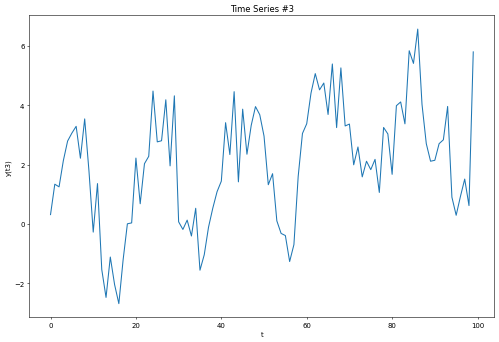

In [50]:
plt.plot(df['t3'])
plt.xlabel("t")
plt.ylabel("y(t3)")
plt.title('Time Series #3')

# Triple Exponential Smoothing

#### Add in a another formula to account for periodic cycles!

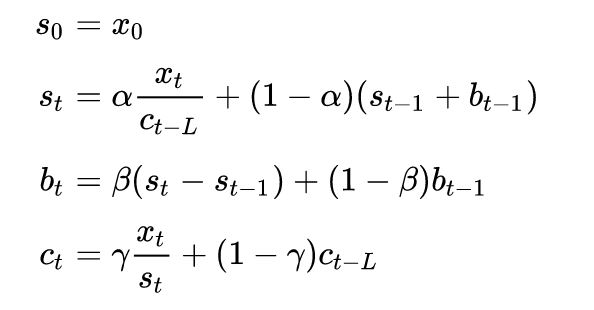

In [54]:
ets_model = ets(trend="additive",
               damped=False,
               seasonal="additive",
              sp = 20,
               smoothing_level = 0.4, # Single exponential smoothing (Alpha )
               smoothing_slope = 0.3, # Double Exponential smoothing (Beta)
               smoothing_seasonal = 0.2 ) # Triple Exponential smoothing (Gamma)

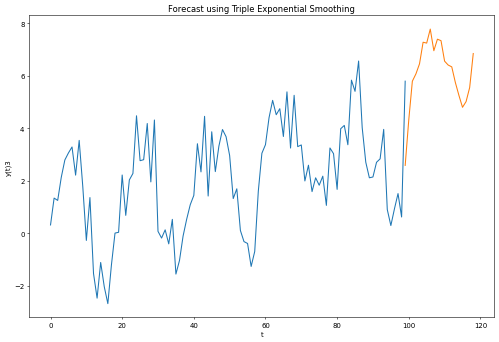

In [58]:
ets_model.fit(df['t3'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t3'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)3")
plt.title("Forecast using Triple Exponential Smoothing")
plt.show()

# Exponential Growth

Text(0.5, 1.0, 'Time Series #4')

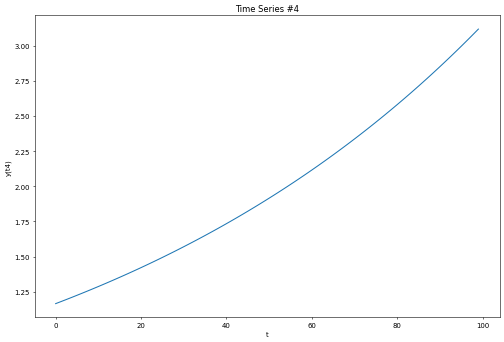

In [60]:
plt.plot(df['t4'])
plt.xlabel("t")
plt.ylabel("y(t4)")
plt.title('Time Series #4')

In [61]:
# Simple exponential smoothing
ets_model = ets(trend="multiplicative",
               damped=False,
               seasonal=None,
               smoothing_level = 0.6, # Single exponential smoothing (Alpha )
               smoothing_slope = 0.7, # Double Exponential smoothing (Beta)
               smoothing_seasonal = None ) # Triple Exponential smoothing (Gamma)


                

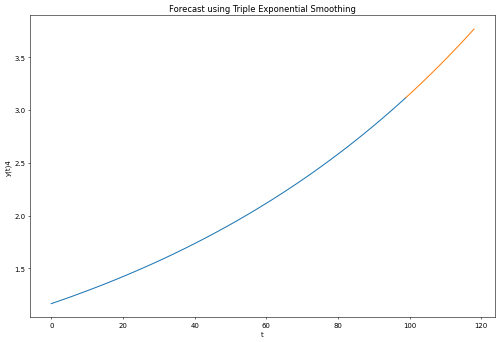

In [62]:
ets_model.fit(df['t4'])
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t4'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)4")
plt.title("Forecast using Triple Exponential Smoothing")
plt.show()

# Choosing alpha, beta, gamma with AutoETS

https://www.sktime.org/en/v0.4.3/modules/auto_generated/sktime.forecasting.ets.AutoETS.html

The SKTime package has compiled an AutoETS feature that will find the best parameters of alpha, beta and gamma via backfitting. Once you have chosen the appropriate model above, then this a great option to get a fast baseline.

In [74]:
ets_model = AutoETS(trend="additive",
               damped=False,
               seasonal="additive",
               sp = 20 ) 

In [75]:
ets_model.fit(df['t3'])


AutoETS(seasonal='additive', sp=20, trend='additive')

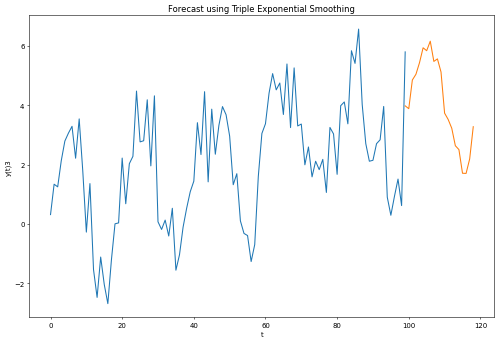

In [78]:
y_h = ets_model.predict(fh=np.arange(0,20))

plt.plot(df['t3'])
plt.plot(y_h)
plt.xlabel("t")
plt.ylabel("y(t)3")
plt.title("Forecast using Triple Exponential Smoothing")
plt.show()